In [85]:
# move all images, CF_pose.csv and checkerboard.yaml to this folder

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

In [2]:
import rowan
def quaternion_rotation_matrix(Q, pose):#yaml_file):
    t_ch_m = np.zeros([4,4])
    # with open(yaml_file) as f:
    #     chess_yaml = yaml.safe_load(f)
    qx = Q[0]
    qy = Q[1]
    qz = Q[2]
    qw = Q[3]
    R_chess = rowan.to_matrix([qw, qx, qy, qz])
    t_ch_m[:3,:3] = R_chess
    t_ch_m[0, 3] = pose[0]
    t_ch_m[1, 3] = pose[1]
    t_ch_m[2, 3] = pose[2]
    t_ch_m[3, 3] = 1
    return t_ch_m

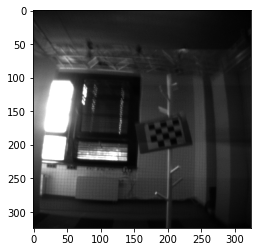

In [3]:
image = imread("img_81.png")
plt.imshow(image, cmap="gray")

In [4]:
camera_intrinsics = [[183.8, 0, 154],
                     [0, 184.1, 143],
                     [0, 0, 1]]

In [5]:
camera_pose = [0.0,-0.191,1.094]
camera_pose_quat = [-0.0,-0.001383770608975631,-0.01660524730770757, 0.9998611658329128]

In [6]:
T_camera_mocap = quaternion_rotation_matrix(camera_pose_quat, camera_pose)
print(T_camera_mocap)

[[ 9.99444702e-01  3.32058839e-02 -2.76715699e-03  0.00000000e+00]
 [-3.32058839e-02  9.99448532e-01  4.59557064e-05 -1.91000000e-01]
 [ 2.76715699e-03  4.59557064e-05  9.99996170e-01  1.09400000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [7]:
checkerboard_pose_mocap = [0.9518477916717529, -0.5427427291870117, 1.1927064657211304]

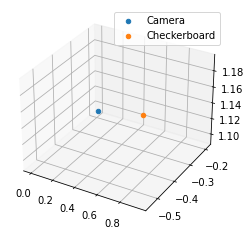

In [8]:
# plausibility check
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(*camera_pose)
ax.scatter3D(*checkerboard_pose_mocap)
ax.legend(["Camera", "Checkerboard"])
plt.show()

In [9]:
checkerboard_pose_quat = [-0.18281225860118866, -0.687646210193634, -0.007697135675698519, 0.7026116251945496]
T_checkerboard_mocap = quaternion_rotation_matrix(checkerboard_pose_quat, checkerboard_pose_mocap)
print(T_checkerboard_mocap)

[[ 0.05416688  0.26223651 -0.96348218  0.95184779]
 [ 0.24060412  0.93304086  0.26747785 -0.54274273]
 [ 0.9691107  -0.24630622 -0.01255526  1.19270647]
 [ 0.          0.          0.          1.        ]]


In [10]:
T_checkerboard_camera = np.linalg.inv(T_camera_mocap) @ T_checkerboard_mocap
print(T_checkerboard_camera)

[[ 0.04882901  0.23042687 -0.97186374  0.9632723 ]
 [ 0.24231463  0.9412228   0.23533649 -0.31993727]
 [ 0.96896816 -0.24698805 -0.00987682  0.09605601]
 [ 0.          0.          0.          1.        ]]


In [11]:
# checkerboard_in_camerea = T_camera_mocap^-1 @ T_checkerboard_mocap @ checkerboard_pose_mocap
checkerboard_in_camera = T_checkerboard_camera @ np.array([*checkerboard_pose_mocap, 1.])
print(checkerboard_in_camera)

[-0.2744606  -0.3194451   1.14063704  1.        ]


In [12]:
checkerboard_in_pixel = camera_intrinsics @ checkerboard_in_camera[:3]
print(checkerboard_in_pixel)
x_img = checkerboard_in_pixel[0] / checkerboard_in_pixel[2] + 0.025
y_img = checkerboard_in_pixel[1] - 0.010 / checkerboard_in_pixel[2] + 0.025
print(x_img, y_img)

# the values should be the same as in the cell below

[125.21224569 104.30125303   1.14063704]
109.79896074439694 104.31748599437304


In [13]:
x = checkerboard_in_camera[0]#checkerboard_in_camera[1]
y = checkerboard_in_camera[1] - 0.010 #checkerboard_in_camera[2]
z = checkerboard_in_camera[2] + 0.025#checkerboard_in_camera[0]
x_img = (-x/z*183.8 + 154)
y_img = (-y/z*184.1 + 143)
print(x_img, y_img)

197.27750129474035 195.0323579710895


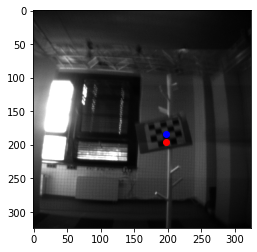

In [14]:
plt.imshow(image, cmap="gray")
plt.scatter(x_img, y_img, color='r')
plt.scatter(198, 184, color='b')

In [15]:
#------- next image

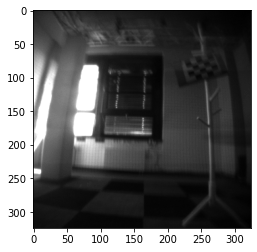

In [16]:
image = imread("img_57.png")
plt.imshow(image, cmap="gray")

In [17]:
camera_pose = [0.006,0.003,0.429]
camera_pose_quat = [0.004151311826926893,-0.005535082435902524,0.05258328314107398, 0.998592573478618]
T_camera_mocap = quaternion_rotation_matrix(camera_pose_quat, camera_pose)
print(T_camera_mocap)

[[ 0.99440872 -0.10506451 -0.01061801  0.006     ]
 [ 0.1049726   0.99443553 -0.00887304  0.003     ]
 [ 0.01149116  0.00770883  0.99990426  0.429     ]
 [ 0.          0.          0.          1.        ]]


In [18]:
checkerboard_pose_mocap = [0.9518477916717529, -0.5427427291870117, 1.1927064657211304]
checkerboard_quat_mocap = [-0.18281225860118866, -0.687646210193634, -0.007697135675698519, 0.7026116251945496]
T_checkerboard_mocap = quaternion_rotation_matrix(checkerboard_quat_mocap, checkerboard_pose_mocap)
print(T_checkerboard_mocap)

[[ 0.05416688  0.26223651 -0.96348218  0.95184779]
 [ 0.24060412  0.93304086  0.26747785 -0.54274273]
 [ 0.9691107  -0.24630622 -0.01255526  1.19270647]
 [ 0.          0.          0.          1.        ]]


In [19]:
checkerboard_pose_mocap = [*checkerboard_pose_mocap, 1]
print(checkerboard_pose_mocap)

[0.9518477916717529, -0.5427427291870117, 1.1927064657211304, 1]


In [20]:
T_checkerboard_camera = np.linalg.inv(T_camera_mocap) @ T_checkerboard_mocap
print(T_checkerboard_camera)
checkerboard_in_camera = T_checkerboard_camera @ np.array([checkerboard_pose_mocap]).T
print(checkerboard_in_camera.T)
x = checkerboard_in_camera[0]
y = checkerboard_in_camera[1] - 0.010
z = checkerboard_in_camera[2] + 0.025
x_img = (-x/z*183.8 + 154)
y_img = (-y/z*184.1 + 143)
print(x_img, y_img)


[[ 0.09025706  0.35588365 -0.93016152  0.89204714]
 [ 0.24104498  0.8983985   0.36712047 -0.63619371]
 [ 0.96630789 -0.25734598 -0.00469715  0.75843273]
 [ 0.          0.          0.          1.        ]]
[[-0.32460479 -0.45648787  1.8122811   1.        ]]
[186.47318041] [189.74321034]


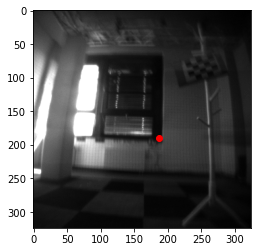

In [21]:
plt.imshow(image, cmap="gray")
plt.scatter(x_img, y_img, color='r')
#plt.scatter(198, 184, color='b')

In [22]:
#---- trying to calculate frontnet transformation matrix with direct linear transformation (DLT) 

# we'll need at least 6 points for the calculation, more is always better

In [23]:
import sys
sys.path.append('../')
from adversarial_frontnet.util import load_dataset
import torch

dataset_path = '../pulp-frontnet/PyTorch/Data/160x96OthersTrainsetAug.pickle'
torch.manual_seed(42)
np.random.seed(42)

dataset = load_dataset(path=dataset_path, batch_size=32, shuffle=True, drop_last=True, num_workers=0)

In [24]:
image_batch, positions = next(iter(dataset))
pixel_coordinates = []

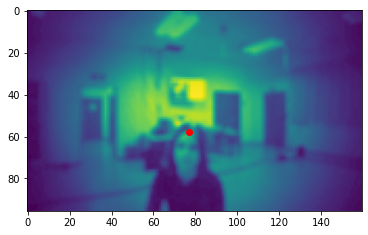

In [30]:
image = image_batch[0][0]
plt.imshow(image)
u = 77
v = 58
plt.scatter(u,v,color='r')
plt.show()

In [31]:
pixel_coordinates.append([u, v])

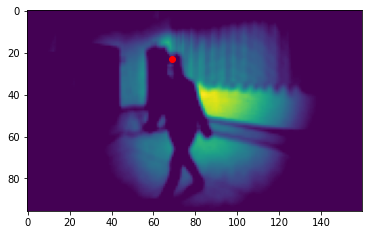

In [34]:
image = image_batch[1][0]
plt.imshow(image)
u = 69
v = 23
plt.scatter(u,v,color='r')
plt.show()

In [35]:
pixel_coordinates.append([u, v])

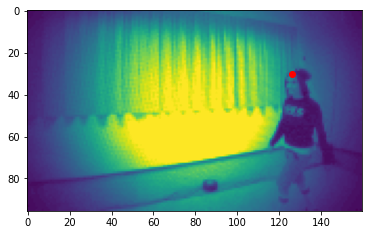

In [42]:
image = image_batch[3][0]
plt.imshow(image)
u = 126
v = 30
plt.scatter(u,v,color='r')
plt.show()

In [43]:
pixel_coordinates.append([u, v])

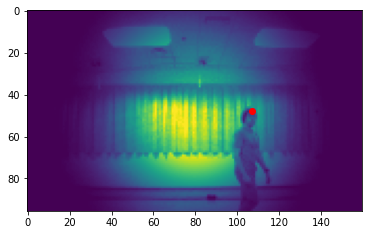

In [48]:
image = image_batch[4][0]
plt.imshow(image)
u = 107
v = 48
plt.scatter(u,v,color='r')
plt.show()

In [49]:
pixel_coordinates.append([u, v])

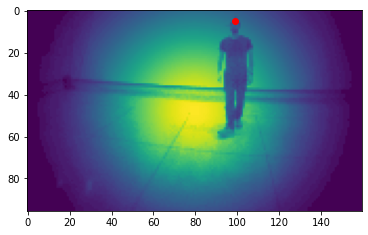

In [56]:
image = image_batch[5][0]
plt.imshow(image)
u = 99
v = 5
plt.scatter(u,v,color='r')
plt.show()

In [57]:
pixel_coordinates.append([u, v])

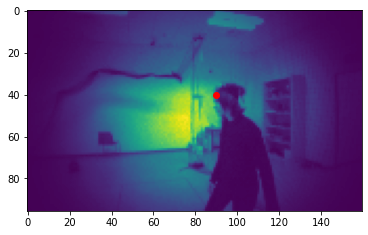

In [62]:
image = image_batch[6][0]
plt.imshow(image)
u = 90
v = 40
plt.scatter(u,v,color='r')
plt.show()

In [63]:
pixel_coordinates.append([u, v])

In [69]:
# ground-truth positions
dlt_positions = [positions[0][:3].numpy(), positions[1][:3].numpy(), positions[3][:3].numpy(), positions[4][:3].numpy(), positions[5][:3].numpy(), positions[6][:3].numpy()]
print(dlt_positions)

[array([ 1.042559  ,  0.04761995, -0.04734083], dtype=float32), array([1.857501  , 0.32838023, 0.16018362], dtype=float32), array([ 1.9024272 , -0.7427328 ,  0.04694715], dtype=float32), array([ 2.607864  , -0.57336384,  0.49607974], dtype=float32), array([ 2.6390414 , -0.24467003,  0.40299603], dtype=float32), array([ 1.4542791 , -0.08610555,  0.16927907], dtype=float32)]


In [68]:
# pixel-coordinates
print(pixel_coordinates)

[[77, 58], [69, 23], [126, 30], [107, 48], [99, 5], [90, 40]]


In [73]:
# code taken from: https://github.com/acvictor/DLT
def Normalization(nd, x):
    '''
    Normalization of coordinates (centroid to the origin and mean distance of sqrt(2 or 3).
    Input
    -----
    nd: number of dimensions, 3 here
    x: the data to be normalized (directions at different columns and points at rows)
    Output
    ------
    Tr: the transformation matrix (translation plus scaling)
    x: the transformed data
    '''

    x = np.asarray(x)
    m, s = np.mean(x, 0), np.std(x)
    if nd == 2:
        Tr = np.array([[s, 0, m[0]], [0, s, m[1]], [0, 0, 1]])
    else:
        Tr = np.array([[s, 0, 0, m[0]], [0, s, 0, m[1]], [0, 0, s, m[2]], [0, 0, 0, 1]])
        
    Tr = np.linalg.inv(Tr)
    x = np.dot( Tr, np.concatenate( (x.T, np.ones((1,x.shape[0]))) ) )
    x = x[0:nd, :].T

    return Tr, x


def DLTcalib(nd, xyz, uv):
    '''
    Camera calibration by DLT using known object points and their image points.
    Input
    -----
    nd: dimensions of the object space, 3 here.
    xyz: coordinates in the object 3D space.
    uv: coordinates in the image 2D space.
    The coordinates (x,y,z and u,v) are given as columns and the different points as rows.
    There must be at least 6 calibration points for the 3D DLT.
    Output
    ------
     L: array of 11 parameters of the calibration matrix.
     err: error of the DLT (mean residual of the DLT transformation in units of camera coordinates).
    '''
    if (nd != 3):
        raise ValueError('%dD DLT unsupported.' %(nd))
    
    # Converting all variables to numpy array
    xyz = np.asarray(xyz)
    uv = np.asarray(uv)

    n = xyz.shape[0]

    # Validating the parameters:
    if uv.shape[0] != n:
        raise ValueError('Object (%d points) and image (%d points) have different number of points.' %(n, uv.shape[0]))

    if (xyz.shape[1] != 3):
        raise ValueError('Incorrect number of coordinates (%d) for %dD DLT (it should be %d).' %(xyz.shape[1],nd,nd))

    if (n < 6):
        raise ValueError('%dD DLT requires at least %d calibration points. Only %d points were entered.' %(nd, 2*nd, n))
        
    # Normalize the data to improve the DLT quality (DLT is dependent of the system of coordinates).
    # This is relevant when there is a considerable perspective distortion.
    # Normalization: mean position at origin and mean distance equals to 1 at each direction.
    Txyz, xyzn = Normalization(nd, xyz)
    Tuv, uvn = Normalization(2, uv)

    A = []

    for i in range(n):
        x, y, z = xyzn[i, 0], xyzn[i, 1], xyzn[i, 2]
        u, v = uvn[i, 0], uvn[i, 1]
        A.append( [x, y, z, 1, 0, 0, 0, 0, -u * x, -u * y, -u * z, -u] )
        A.append( [0, 0, 0, 0, x, y, z, 1, -v * x, -v * y, -v * z, -v] )

    # Convert A to array
    A = np.asarray(A) 

    # Find the 11 parameters:
    U, S, V = np.linalg.svd(A)

    # The parameters are in the last line of Vh and normalize them
    L = V[-1, :] / V[-1, -1]
    print(L)
    # Camera projection matrix
    H = L.reshape(3, nd + 1)
    print(H)

    # Denormalization
    # pinv: Moore-Penrose pseudo-inverse of a matrix, generalized inverse of a matrix using its SVD
    H = np.dot( np.dot( np.linalg.pinv(Tuv), H ), Txyz )
    print(H)
    H = H / H[-1, -1]
    print(H)
    #L = H.flatten()
    #print(L)

    # Mean error of the DLT (mean residual of the DLT transformation in units of camera coordinates):
    uv2 = np.dot( H, np.concatenate( (xyz.T, np.ones((1, xyz.shape[0]))) ) ) 
    uv2 = uv2 / uv2[2, :] 
    # Mean distance:
    err = np.sqrt( np.mean(np.sum( (uv2[0:2, :].T - uv)**2, 1)) ) 

    return H, err


In [74]:
nd = 3
P, err = DLTcalib(nd, dlt_positions, pixel_coordinates)
print('Matrix')
print(P)
print('\nError')
print(err)

[ -3.23004215   3.47726026  18.98486857  -1.15708886  -2.13304172
  -1.25279021   5.07644122   1.07491701 -16.87116984   0.14038974
  51.28950133   1.        ]
[[ -3.23004215   3.47726026  18.98486857  -1.15708886]
 [ -2.13304172  -1.25279021   5.07644122   1.07491701]
 [-16.87116984   0.14038974  51.28950133   1.        ]]
[[-1698.79546749   135.12858863  5485.84820999  2216.57808722]
 [ -644.24882325   -39.19226631  1909.18140068   908.08063815]
 [  -16.7485517      0.1393694     50.91673384    22.71897296]]
[[-74.77430737   5.94782999 241.46550194  97.56506559]
 [-28.35730402  -1.7250897   84.03467022  39.97014476]
 [ -0.73720549   0.00613449   2.24115474   1.        ]]
Matrix
[[-74.77430737   5.94782999 241.46550194  97.56506559]
 [-28.35730402  -1.7250897   84.03467022  39.97014476]
 [ -0.73720549   0.00613449   2.24115474   1.        ]]

Error
21.15207319695571


In [80]:
# test matrix

values = P @ [*dlt_positions[0], 1]
x_img = values[0]/values[2]
y_img = values[1]/values[2]
print(x_img, y_img)

67.35324666142535 50.51645653578779


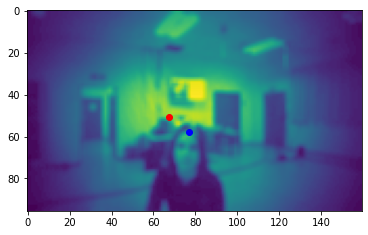

In [82]:
image = image_batch[0][0]
plt.imshow(image)
plt.scatter(*pixel_coordinates[0],color='b')
plt.scatter(x_img, y_img, color='r')
plt.show()

In [83]:
values = P @ [*dlt_positions[1], 1]
x_img = values[0]/values[2]
y_img = values[1]/values[2]
print(x_img, y_img)

83.39910931080232 -22.866288564140454


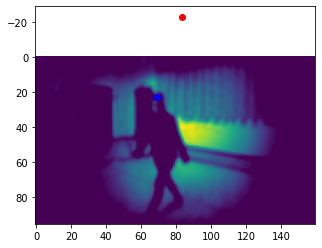

In [84]:
image = image_batch[1][0]
plt.imshow(image)
plt.scatter(*pixel_coordinates[1],color='b')
plt.scatter(x_img, y_img, color='r')
plt.show()